In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore Warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the dataset
df=pd.read_csv('boston.csv')

#BASIC EDA

In [3]:
df.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,HOUSEPRICE
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CRIM        506 non-null    float64
 1   ZN          506 non-null    float64
 2   INDUS       506 non-null    float64
 3   NOX         506 non-null    float64
 4   RM          506 non-null    float64
 5   AGE         506 non-null    float64
 6   DIS         506 non-null    float64
 7   RAD         506 non-null    int64  
 8   TAX         506 non-null    int64  
 9   PTRATIO     506 non-null    float64
 10  B           506 non-null    float64
 11  LSTAT       506 non-null    float64
 12  HOUSEPRICE  506 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 51.5 KB


##NULL VALUE CHECK

In [5]:
df.isnull().sum()

CRIM          0
ZN            0
INDUS         0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
B             0
LSTAT         0
HOUSEPRICE    0
dtype: int64

##DUPLICATE CHECK

In [6]:
df.duplicated()
df[df.duplicated()]

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,HOUSEPRICE


##OUTLIER CHECK

<Axes: >

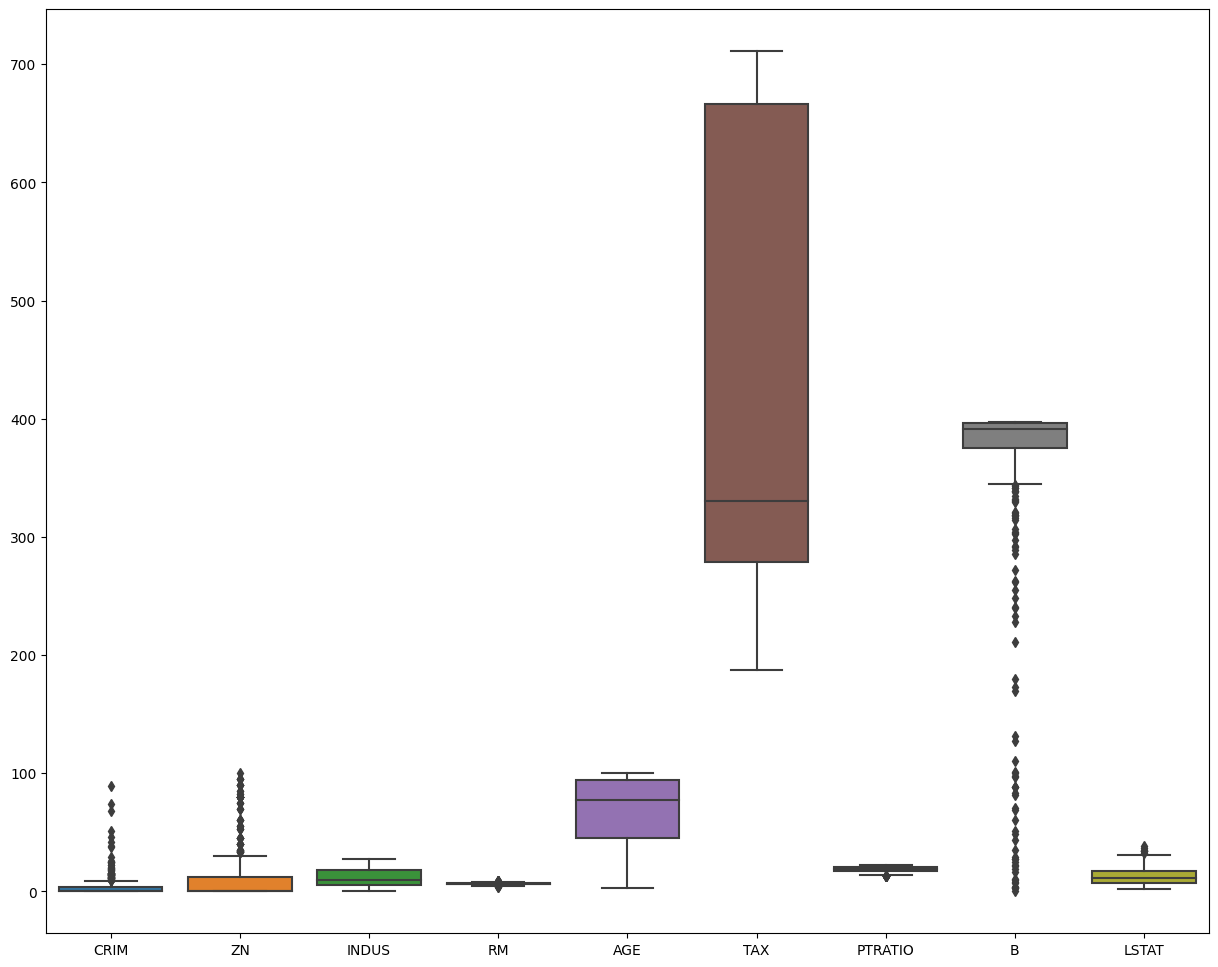

In [7]:
plt.figure(figsize=(15,12)) # Set the Width & Height
# df.boxplot(column=['age','trtbps','chol','thalachh','oldpeak'])
sns.boxplot(data=df[['CRIM','ZN','INDUS','RM','AGE','TAX','PTRATIO','B','LSTAT']])

##OUTLIER HANDELING

In [8]:

def detect_outliers_iqr(data):
    outlier_list = []
    data = sorted(data)

    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    #print("The Val of Q1 and Q2",q1, q3)
    IQR = q3-q1

    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)

    #print("The lower & Upper Bound",lwr_bound, upr_bound)

    for i in data:
        if (i<lwr_bound or i>upr_bound):
            outlier_list.append(i)
    return outlier_list



for i in ['CRIM','ZN','INDUS','RM','AGE','TAX','PTRATIO','B','LSTAT']:
    outliers = detect_outliers_iqr(df[i])
    print("Outliers in",i,"attribute :", outliers)

Outliers in CRIM attribute : [9.18702, 9.2323, 9.32909, 9.33889, 9.39063, 9.51363, 9.59571, 9.72418, 9.82349, 9.91655, 9.92485, 9.96654, 10.0623, 10.233, 10.8342, 11.0874, 11.1081, 11.1604, 11.5779, 11.8123, 11.9511, 12.0482, 12.2472, 12.8023, 13.0751, 13.3598, 13.5222, 13.6781, 13.9134, 14.0507, 14.2362, 14.3337, 14.3337, 14.4208, 14.4383, 15.0234, 15.1772, 15.288, 15.5757, 15.8603, 15.8744, 16.8118, 17.8667, 18.0846, 18.4982, 18.811, 19.6091, 20.0849, 20.7162, 22.0511, 22.5971, 23.6482, 24.3938, 24.8017, 25.0461, 25.9406, 28.6558, 37.6619, 38.3518, 41.5292, 45.7461, 51.1358, 67.9208, 73.5341, 88.9762]
Outliers in ZN attribute : [33.0, 33.0, 33.0, 33.0, 34.0, 34.0, 34.0, 35.0, 35.0, 35.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 52.5, 52.5, 52.5, 55.0, 55.0, 55.0, 60.0, 60.0, 60.0, 60.0, 70.0, 70.0, 70.0, 75.0, 75.0, 75.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 82.5, 82.5, 85.0, 85.0, 90.0, 90.0, 9

In [9]:
def handle_outliers(data):

    tenth_percentile = np.percentile(data, 10)
    ninetieth_percentile = np.percentile(data, 90)

    b = np.where(data<tenth_percentile, tenth_percentile, data)

    b1 = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
    return b1


for i in ['CRIM','ZN','RM','PTRATIO','B','LSTAT']:
    df[i]=handle_outliers(df[i])

###OUTLIER REMOVED

<Axes: >

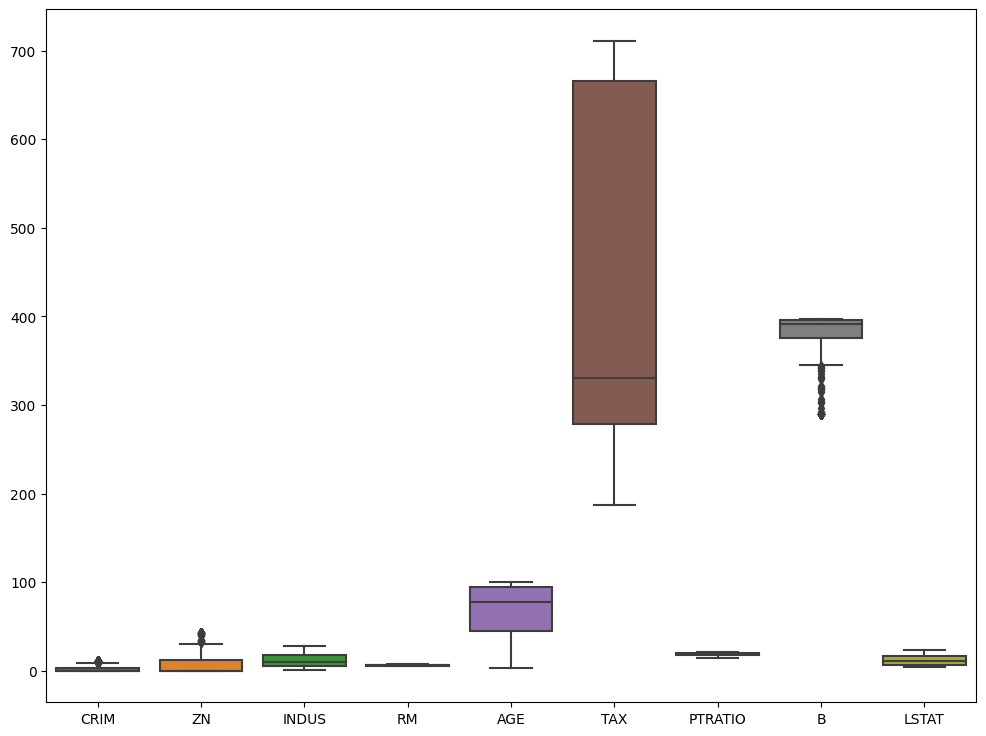

In [10]:
plt.figure(figsize=(12,9))
sns.boxplot(data=df[['CRIM','ZN','INDUS','RM','AGE','TAX','PTRATIO','B','LSTAT']])

In [11]:
df.head(1)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,HOUSEPRICE
0,0.038195,18.0,2.31,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0


##CORRELATION MAP

Text(0.5, 1.0, 'Correlation map')

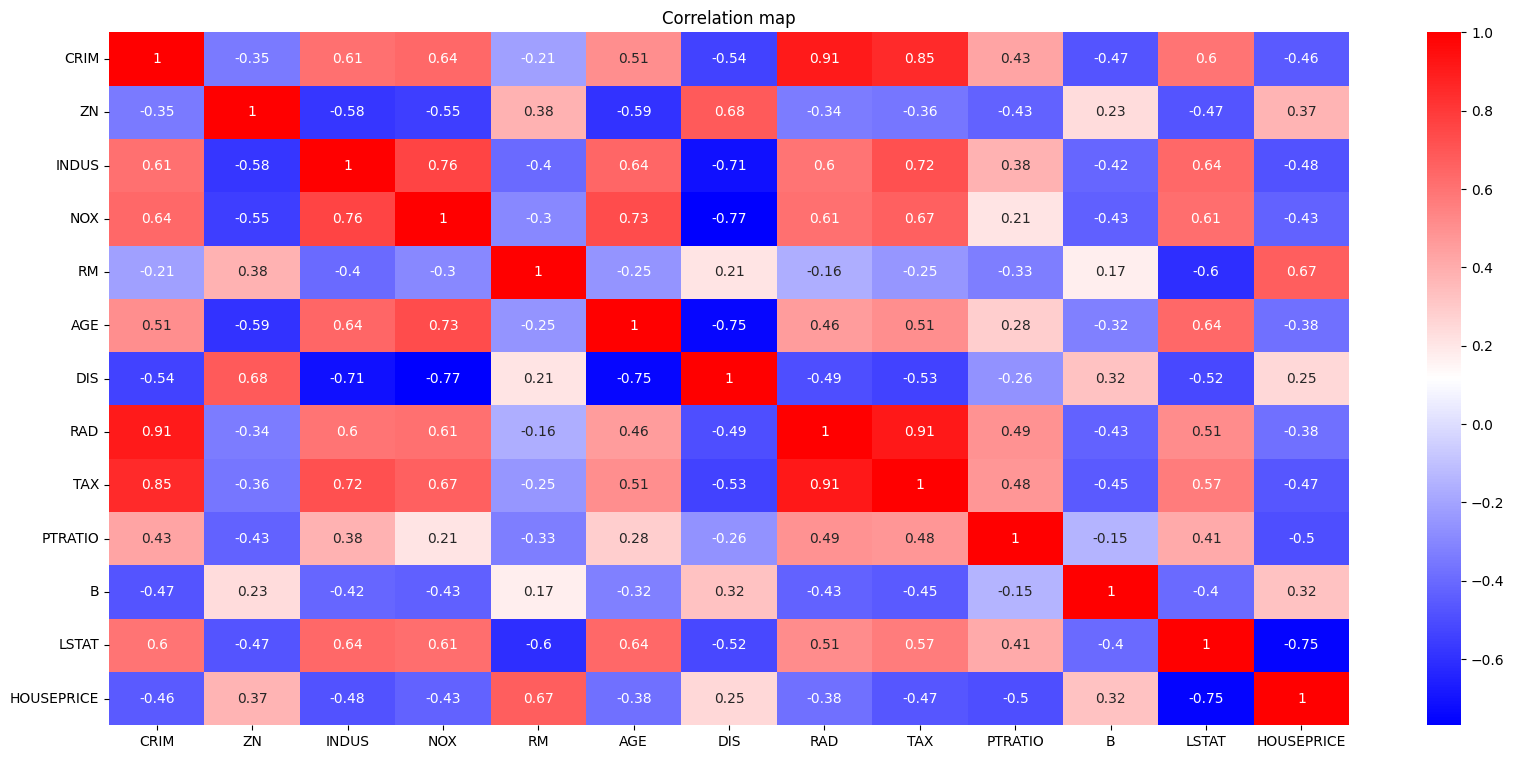

In [12]:
plt.figure(figsize=(20,9));
sns.heatmap(df.corr(),annot=True,cmap='bwr');
plt.title("Correlation map")

#LINEAR REGRESSION

<Axes: xlabel='LSTAT', ylabel='HOUSEPRICE'>

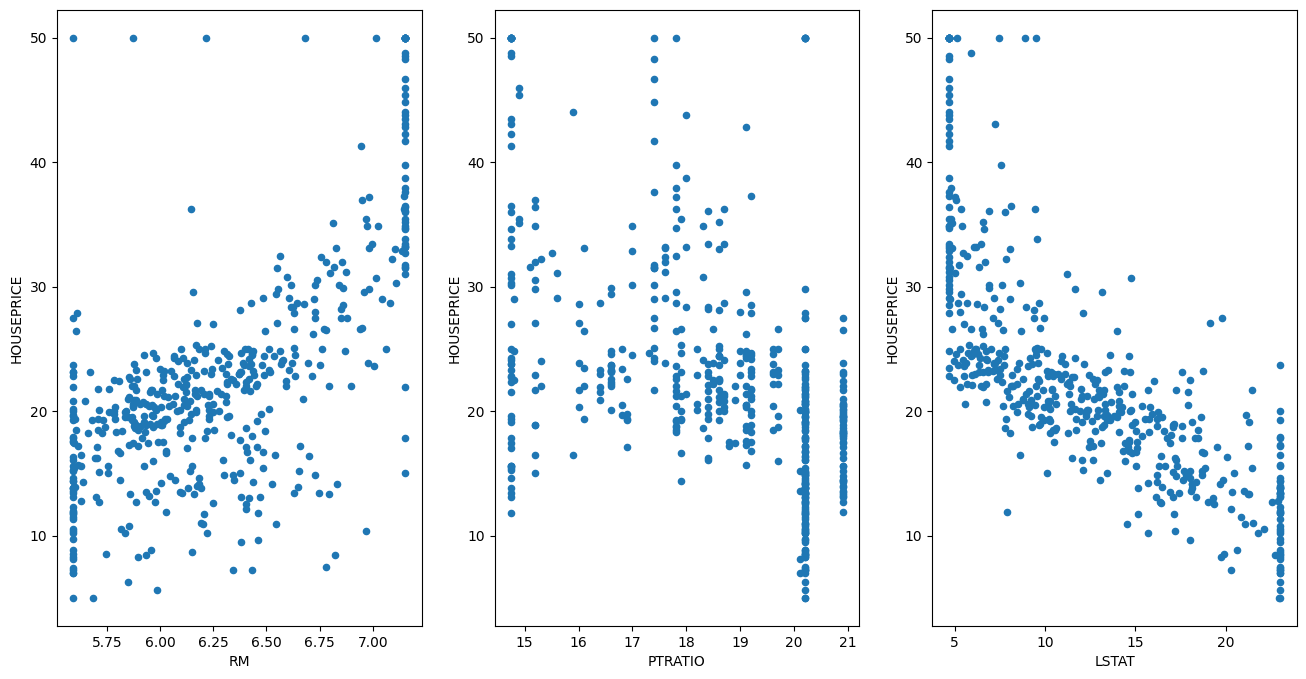

In [46]:
fig, axs = plt.subplots(1, 3)   #(rows,cols)
df.plot(kind='scatter', x='RM', y='HOUSEPRICE', ax=axs[0], figsize=(16,8))
df.plot(kind='scatter', x='PTRATIO', y='HOUSEPRICE', ax=axs[1])
df.plot(kind='scatter', x='LSTAT', y='HOUSEPRICE', ax=axs[2])

In [33]:
feature_cols = ['LSTAT']
x = df[feature_cols] # Features
y = df.HOUSEPRICE # Target variable

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 6)

In [35]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(379, 1)
(379,)
(127, 1)
(127,)


In [36]:
from sklearn.linear_model import LinearRegression
my_first_model = LinearRegression()
my_first_model.fit(X_train,y_train)

LinearRegression()

In [37]:
my_first_model.coef_


array([-1.17622804])

In [38]:
my_first_model.intercept_

36.94779935298375

In [39]:
-1.176*127 + 36.95

-112.402

In [40]:
Pred = my_first_model.predict(X_test)

In [41]:

Pred

array([21.13929451, 29.46698903, 28.00846626, 25.57367422, 21.73917081,
       27.23215575, 11.98824037, 31.44305213, 25.75010842, 16.24618587,
       29.23174342, 14.58770433, 31.44305213, 31.44305213, 31.44305213,
       12.89393596, 11.87061756, 29.12588289, 20.32769716,  9.85338648,
        9.85338648, 31.44305213, 25.73834614, 24.52683126, 19.10442   ,
       11.96471581, 18.46925686, 26.44408297, 22.32728483, 20.89228662,
       24.15043829, 23.16240674, 25.26785493, 31.44305213, 16.7049148 ,
       22.78601376, 15.71688325, 26.10297683, 15.85803061,  9.85338648,
        9.85338648, 10.36504567,  9.85338648, 10.03570182, 21.52744976,
       28.47895747, 31.01961004, 22.36257167, 18.65745335, 15.74040781,
       25.32666633, 18.49278142, 22.79777604, 23.42117691, 29.20821886,
       31.44305213, 16.587292  , 31.41952757, 16.02270254, 21.89208045,
       27.03219698, 25.2208058 ,  9.85338648, 29.54932499, 21.24515503,
       11.87061756, 31.44305213, 17.9634788 , 23.63289795, 30.60

In [42]:
y_test

375    15.0
347    23.1
223    30.1
501    22.4
286    20.1
       ... 
66     19.4
46     20.0
373    13.8
17     17.5
280    45.4
Name: HOUSEPRICE, Length: 127, dtype: float64

In [43]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [44]:
my_linear_preds_train = my_first_model.predict(X_train)
print('MAE on Train Data :', mean_absolute_error(my_linear_preds_train,y_train))
print('MSE on Train Data :', mean_squared_error(my_linear_preds_train,y_train))
print('RMSE on Train Data :', np.sqrt(mean_squared_error(my_linear_preds_train,y_train)))
print('R-squared on Train Data :', my_first_model.score(X_train, y_train))

MAE on Train Data : 4.334198438511082
MSE on Train Data : 36.25848636473181
RMSE on Train Data : 6.021502002385436
R-squared on Train Data : 0.5662185737373635


In [45]:
my_model_preds = my_first_model.predict(X_test)
print('MAE on Train Data :', mean_absolute_error(my_model_preds,y_test))
print('MSE on Train Data :', mean_squared_error(my_model_preds,y_test))
print('RMSE on Train Data :', np.sqrt(mean_squared_error(my_model_preds,y_test)))
print('R-squared on Train Data :', my_first_model.score(X_test, y_test))

MAE on Train Data : 4.557024637001588
MSE on Train Data : 37.046487584147435
RMSE on Train Data : 6.086582586652993
R-squared on Train Data : 0.5702312152392612


#MULTIPLE LINEAR REGRESSION

In [48]:
feature_cols = ['LSTAT', 'PTRATIO', 'RM']
x = df[feature_cols] # Features
y = df.HOUSEPRICE # Target variable

In [58]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 10,test_size=0.1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 3)
(51, 3)
(455,)
(51,)


In [59]:
my_multiple_linear_model = LinearRegression()
my_multiple_linear_model.fit(X_train,y_train)

LinearRegression()

In [60]:
my_multiple_linear_model.coef_

array([-0.75487852, -0.80925179,  5.70086424])

In [61]:
my_multiple_linear_model.intercept_

10.911854141012306

In [62]:
Pred1 = my_multiple_linear_model.predict(X_test)
Pred1

array([26.99747389, 33.25636415, 30.20850497, 30.08165642, 20.83838765,
       19.01160069, 36.21228943, 12.28979144, 19.3047954 , 34.06777219,
       18.29144864, 28.55117445, 24.39968021, 32.20991473, 32.05029053,
       35.28378884, 27.87799417, 17.90161382, 24.16565536, 22.50222397,
       35.02365923, 17.28485931, 24.27189675, 27.00170668, 35.84812612,
       20.62553077, 19.34103739, 18.23443523, 36.09090166,  9.06412544,
       32.99192838, 32.79957628, 28.77205116, 26.21801876, 17.42824101,
       17.7612401 , 11.01097058, 32.59116595, 26.4081386 , 26.83120393,
       34.06777219, 28.82211584, 15.74171988, 32.40320224, 16.61074233,
       29.42198187, 19.4893442 , 20.17919399, 36.09090166, 15.46589167,
       23.56146356])

In [63]:
y_test

305    28.4
193    31.1
65     23.5
349    26.6
151    19.6
433    14.3
161    50.0
129    14.3
269    20.7
226    37.6
107    20.4
222    27.5
181    36.2
275    32.0
277    33.1
262    48.8
325    24.6
184    26.4
176    23.2
154    17.0
157    41.3
446    14.9
114    18.5
324    25.0
192    36.4
336    19.5
7      27.1
458    14.9
282    46.0
412    17.9
197    30.3
227    31.6
347    23.1
43     24.7
476    16.7
497    18.3
438     8.4
291    37.3
311    22.1
91     22.0
228    46.7
223    30.1
402    12.1
194    29.1
47     16.6
343    23.9
361    19.9
479    21.4
280    45.4
24     15.6
164    22.7
Name: HOUSEPRICE, dtype: float64

In [64]:
my_multiple_linear_preds_train = my_multiple_linear_model.predict(X_train)
print('MAE on Train Data :', mean_absolute_error(my_multiple_linear_preds_train,y_train))
print('MSE on Train Data :', mean_squared_error(my_multiple_linear_preds_train,y_train))
print('RMSE on Train Data :', np.sqrt(mean_squared_error(my_multiple_linear_preds_train,y_train)))
print('R-squared on Train Data :', my_multiple_linear_model.score(X_train, y_train))


MAE on Train Data : 3.6975069344746383
MSE on Train Data : 27.41799856848762
RMSE on Train Data : 5.236219873963241
R-squared on Train Data : 0.6620634063965067


In [65]:
my_multiple_linear_preds = my_multiple_linear_model.predict(X_test)
print('MAE on Train Data :', mean_absolute_error(my_multiple_linear_preds,y_test))
print('MSE on Train Data :', mean_squared_error(my_multiple_linear_preds,y_test))
print('RMSE on Train Data :', np.sqrt(mean_squared_error(my_multiple_linear_preds,y_test)))
print('R-squared on Train Data :', my_multiple_linear_model.score(X_test, y_test))


MAE on Train Data : 3.989935765486264
MSE on Train Data : 29.220150666752037
RMSE on Train Data : 5.405566636972671
R-squared on Train Data : 0.7048564075937358
